# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import seaborn as sns
df=pd.read_csv('C:\workspace\python\WASSUP\DA_data\mini.csv')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
df.isna().sum()

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

다행히 결측치는 없다!    
먼저 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 것이 필요해보였다.    
- 이를 위해서 1) 가입한 기간에 따른 각 항목들의 인게이지먼트 분석, 2) 월간 활동적인 학습 일수와 기타 상관관계, 3) 구독유형 중 베이직과 프리미엄을 가입하는 사람들은 어떤 영향을 받은 것인지, 4) 다음달에도 구독을 계속할지 말지는 어떤 영향을 받아 결정한건지
등이 알고 싶어졌다. 

먼저 히트맵 분석을 통해 각 항목들과의 연관관계를 살펴보자!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [9]:
df.select_dtypes?

In [12]:
object_columns = df.select_dtypes(include='object').columns
df_int = df.drop(columns=object_columns)
df_int

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,2,0,1


dtype 을 숫자 타입으로만 뽑아주게 했다!

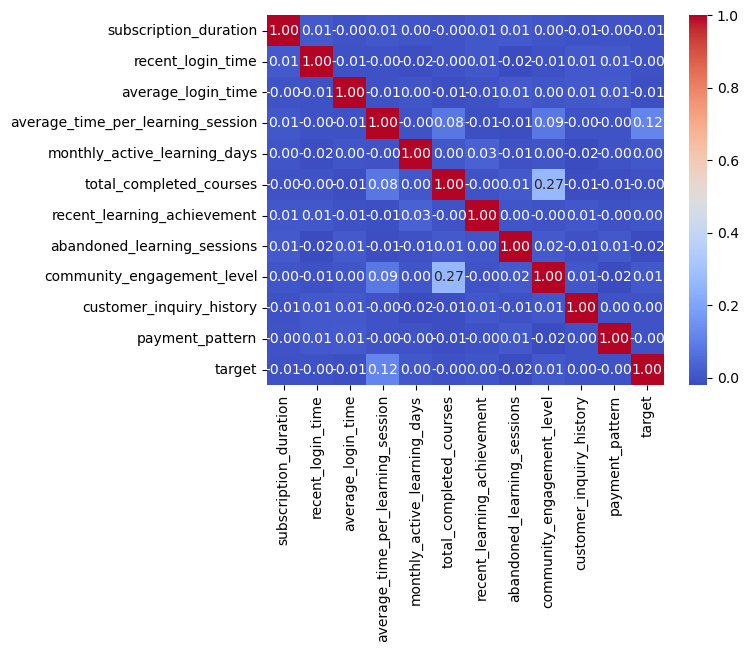

<Figure size 800x600 with 0 Axes>

In [17]:
corr = df_int.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.figure(figsize=(8,6))
plt.show()

다음과 같이 양의 상관관계가 가장 높은 순서대로 나왔다.  
1. 완료한 총 코스 수와 커뮤니티 참여도
2. 구독결정여부(target)와 각 학습 세션에 소요된 평균 시간 (분)
3. 커뮤니티 참여도와 각 학습 세션에 소요된 평균 시간 (분)
4. 완료한 총 코스 수와 각 학습 세션에 소요된 평균 시간 (분)

**이를 통해 구독을 유도하려면 학습 시간을 늘려야 하는 것이 주요 과업이 될 수 있겠다고 생각했다.   
또한 커뮤니티 참여를 독려하여 학습을 끝까지 완수할 수 있게 하는 것도 필요하겠다고 인지했다.** 

다음 항목에서는 매우 낮은 음의 상관관계가 보였는데, 뻔한 시나리오가 나오긴 한다. 
1. 중단된 학습 세션 수는 구독결정여부(target)에 부정적 영향을 미친다. 
2. 월간 활동적인 학습 일수가 적으면 고객 문의도 적게 한다.
3. 사용자가 마지막으로 로그인한 시간 (일)이 늘어나면 중단된 학습 수/월간 활동적인 학습 일수는 적어진다.

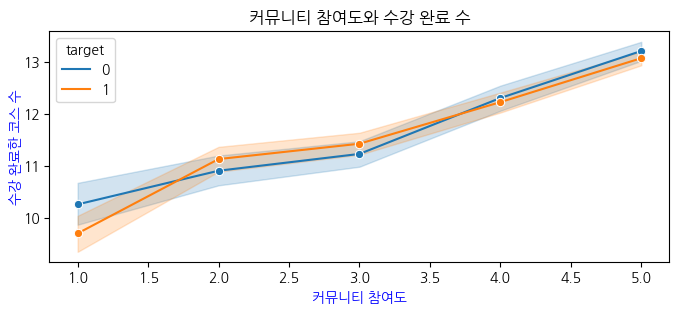

In [203]:
#완료한 총 코스 수와 커뮤니티 참여도 검증
plt.figure(figsize=(8, 3))
sns.lineplot(y='total_completed_courses', x='community_engagement_level', hue='target', marker='o', data=df)
plt.xlabel('커뮤니티 참여도',loc='center', labelpad=5, fontsize=10, color='blue')
plt.ylabel('수강 완료한 코스 수', labelpad=0, fontsize=10, color='blue')
plt.title('커뮤니티 참여도와 수강 완료 수')
plt.show()

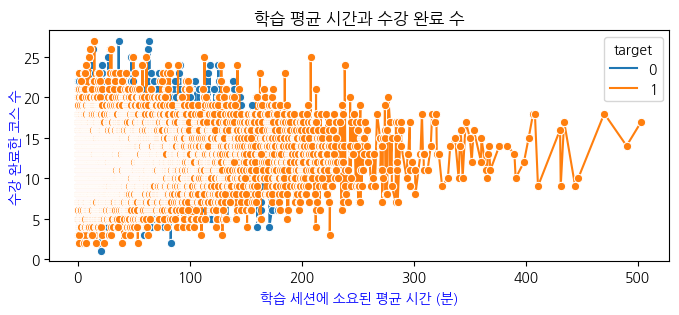

In [206]:
#완료한 총 코스 수와 각 학습 세션에 소요된 평균 시간 (분) 검증 / 구독결정여부 범주
plt.figure(figsize=(8, 3))
sns.lineplot(y='total_completed_courses', x='average_time_per_learning_session', hue='target',marker='o', data=df)
plt.xlabel('학습 세션에 소요된 평균 시간 (분)',loc='center', labelpad=5, fontsize=10, color='blue')
plt.ylabel('수강 완료한 코스 수', labelpad=0, fontsize=10, color='blue')
plt.title('학습 평균 시간과 수강 완료 수')
plt.show()

분명히 보이는 패턴은 '학습에 많은 시간을 쏟아야 구독을 결정한다는 것'이다.    
이는 히트맵에서 분석한 바대로 높은 상관관계를 지닌다.    
반면 수강 완료한 코스 수는 오히려 학습시간이 짧을수록 높게 분포가 되었다.

각 학습 세션에 소요된 평균 시간 (분)을 더 자세히 확인해보자! 

⇒ 교육부 조사에 의하면 ‘ 하위권 학습자들은 구간 탐색을 많이 하면서 영상 완료 건수가 적으며, 상위권 학습자들은 구간 탐색을 적게하면서 영상 완료 건수가 높다.’는 연구 결과가 있다. 

⇒ 이와 비슷하게 학습을 x2배로 빨리감기 한 학습자, x1.5배로 빨리감기, 정속으로 본 학습자들의 학습 성취도를 비교해보면 어떤 결과가 나올까?

## 제1 가설 : 학습 세션에 소요된 평균 시간이 짧을 수록 학업 성취도가 낮을 것이다. 하위권 학습자들은 영상에 오래 집중을 못할 것으로 예상되기 때문이다. (기각됨)

- 해당 가설이 맞다면 영상의 동작은 줄이고 영상을 끝까지 완료할 수 있도록 독려하는 기능이 필요할 것이다.   
  또한 '고득점을 위한 정속 주행 잠금 기능'을 고려해볼 필요도 있겠다.

먼저 모든 항목의 기술통계를 확인해보자! 

In [29]:
df.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [28]:
df['recent_learning_achievement'].describe()

count    10000.000000
mean        75.029513
std          9.968529
min         35.941755
25%         68.278054
50%         75.126061
75%         81.718976
max        112.643828
Name: recent_learning_achievement, dtype: float64

상,중,하 성적을 라벨링해보자. 

In [215]:
bins = [0, 68, 81, df['recent_learning_achievement'].max()]
labels = ['하위', '중위', '상위']

df['achievement_category'] = pd.cut(df['recent_learning_achievement'], bins=bins, labels=labels)
df['achievement_category'].value_counts()

achievement_category
중위    4839
상위    2751
하위    2410
Name: count, dtype: int64

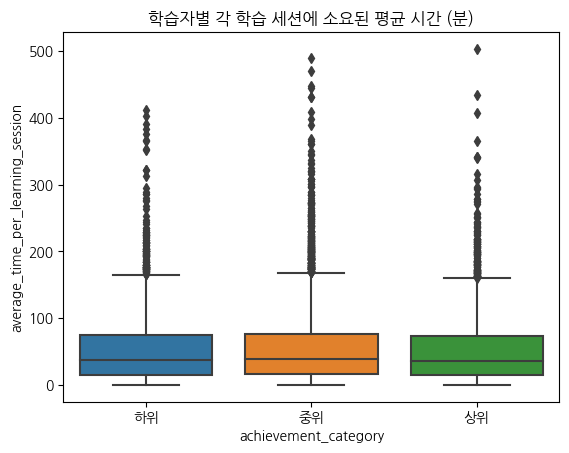

In [216]:
sns.boxplot(x='achievement_category', y='average_time_per_learning_session', data=df)
plt.title("학습자별 각 학습 세션에 소요된 평균 시간 (분)")
plt.show()

C:\Users\vivav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


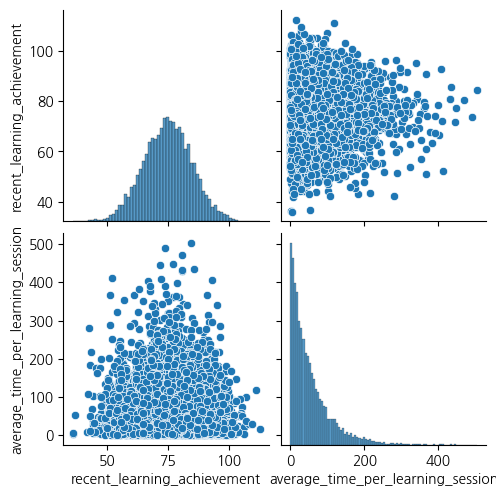

In [217]:
sns.pairplot(df[['recent_learning_achievement','average_time_per_learning_session']])
plt.show()

성적이 올라갈수록 오랜 학습시간에 대한 패턴을 보이기는 하나   
중앙에 몰린 성적을 제외하고는 상위와 하위의 큰 차이가 없었다.   
사실 중위권 수강생들의 경우 영상을 틀어놓고 딴짓을 할 수도 있겠다고 추측해본다.   
이에 학습 시간은 관련이 없음을 인정한다.

### 제1가설 기각

그런데 평균학습시간에 대해 더 알아보고 싶었다. 

C:\Users\vivav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x500 with 0 Axes>

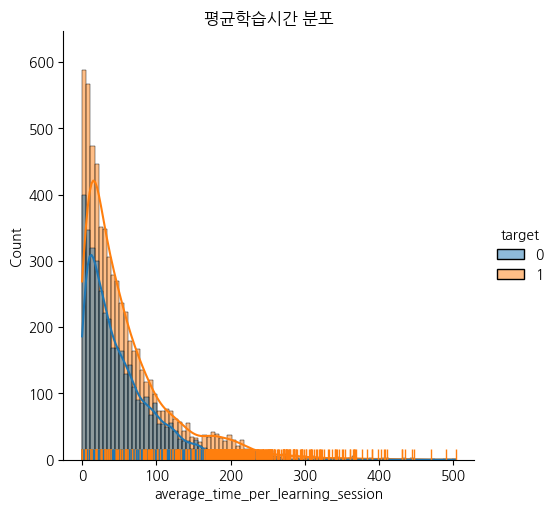

In [132]:
plt.figure(figsize=(7, 5))
sns.displot(data=df, x='average_time_per_learning_session', hue='target', kde=True, rug=True)
plt.title("평균학습시간 분포")
plt.show()

확실히 구독을 결정하는 수강생은 각 학습 세션에 소요된 평균 시간이 길었다.    
그럼에도 전체의 평균학습시간은 매우 적은 쪽으로 편중되어 있다.    
구독전환과 연관이 깊기에 더 오래 학습할 수 있게끔 콘텐츠를 기획하는 것도 좋겠다.

그렇다면 커뮤니티 참여도가 높은 사람의 특성도 궁금해졌다.    
유저의 리텐션을 높일 수 있는 에듀테크 플랫폼을 지향하기 때문에 참여도가 매우 중요하다.

In [169]:
df['community_engagement_level'].value_counts()

community_engagement_level
5    4564
4    2070
3    1588
2    1219
1     559
Name: count, dtype: int64

전체 수강생들의 커뮤니티 참여도는 5가 제일 높아서 양호한 편이다.    
그럼 성적별로 어떻게 분포를 이룰까?

## 제2 가설 : 커뮤니티 참여도가 높을수록 학업 성취도가 높을 것이다. 본인의 목표를 끝마치고 여유가 있어서 참여할 것이기 때문이다. (기각됨)

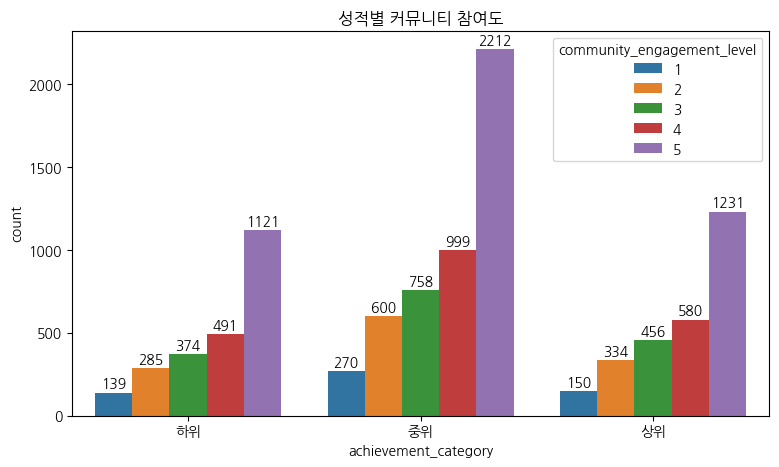

In [218]:
plt.figure(figsize=(9, 5))
cel = sns.countplot(x='achievement_category', hue='community_engagement_level', data=df)
plt.title("성적별 커뮤니티 참여도")
for p in cel.patches:
    cel.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()

중위권 수강생의 커뮤니티 참여도가 5로 매우 높았지만 
하위와 상위권 수강생의 유의미한 차이가 보이지는 않았다. 
### 제2가설 기각

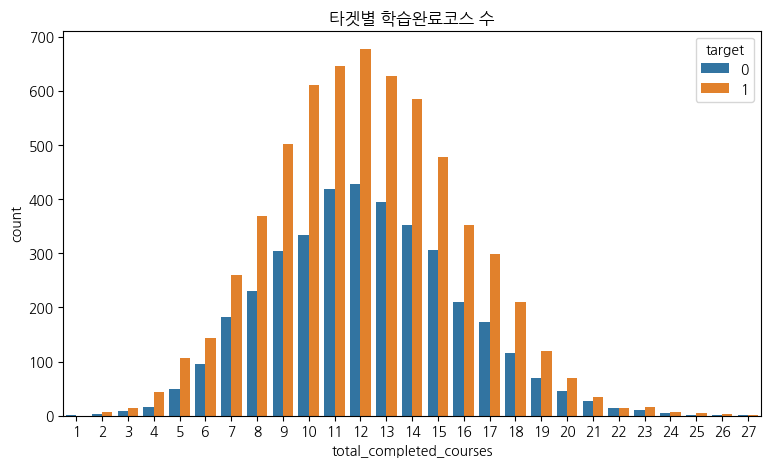

In [117]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='total_completed_courses', hue='target', data=df)
ax.set_title('타겟별 학습완료코스 수')
plt.show()

구독연장여부에 관계없이 통상 11~13개의 코스를 완료하는 수강생들이 많다는 걸 확인했다.   
최대한 이 완료 코스 수를 20개 가량으로 끌어올리는 것이 좋을 것이다.

int로 뜯지 못한 데이터 중에 선호하는 난이도와 구독유형이 있었는데,    
높은 난이도를 선호하는 사람/프리미엄 구독자는 구독을 계속 할지, 대체로 몇 개의 코스를 완료할지도 궁금했다.   
여기서 2번째 가설을 세워볼 수 있겠다. 

## 제3가설 : 프리미엄 구독자의 수강 완료율이 더 높을 것이다. (채택됨)

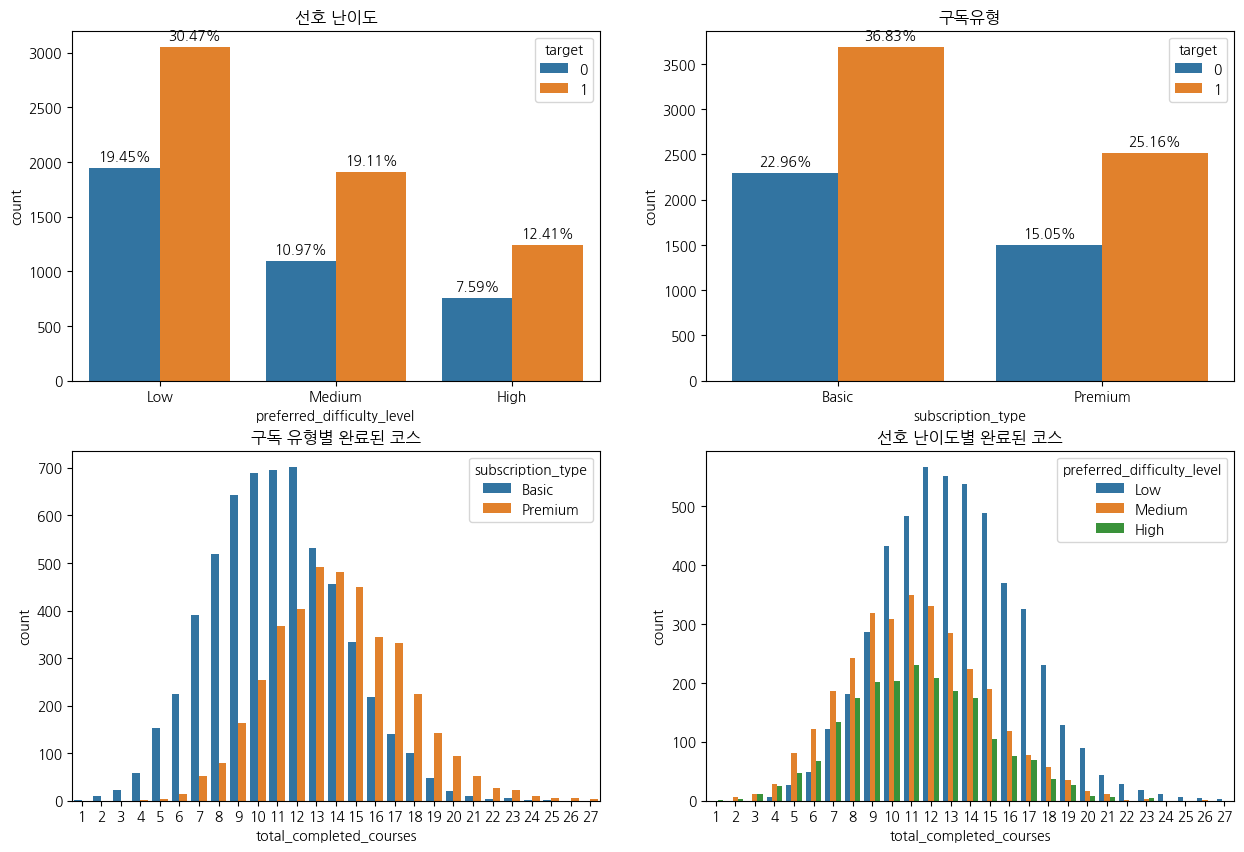

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

ax1 = sns.countplot(x='preferred_difficulty_level', hue='target', data=df, ax=axes[0,0])
axes[0,0].set_title('선호 난이도')

ax2 = sns.countplot(x='subscription_type', hue='target', data=df, ax=axes[0,1])
axes[0,1].set_title('구독유형')

ax3 = sns.countplot(x='total_completed_courses', hue='subscription_type', data=df, ax=axes[1,0])
axes[1,0].set_title('구독 유형별 완료된 코스')

ax4 = sns.countplot(x='total_completed_courses', hue='preferred_difficulty_level', data=df, ax=axes[1,1])
axes[1,1].set_title('선호 난이도별 완료된 코스')

total_height1 = len(df['preferred_difficulty_level'])
total_height2 = len(df['subscription_type'])

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height / total_height1:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height / total_height2:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')


plt.show()

In [81]:
df['target'].value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

target의 1 값 모수가 더 커서 해당 전환 비율이 계속해서 높게 나온다.   
선호난이도와 구독연장간, 구독유형과 구독연장간 딱히 상관관계가 보여지진 않았다.   
단지, 구독 전환그룹 내에서도 'low' 난이도 선호자(30.47%)와 'basic'구독자(36.83%)의 비율이 높다.

또한 확실히 프리미엄을 구독하는 수강생이 코스 완료 수가 오른쪽으로 치우쳐져 있어 더 높다.    
게다가 선호하는 난이도가 낮을수록 더 많은 코스를 완주하고 있었다! 

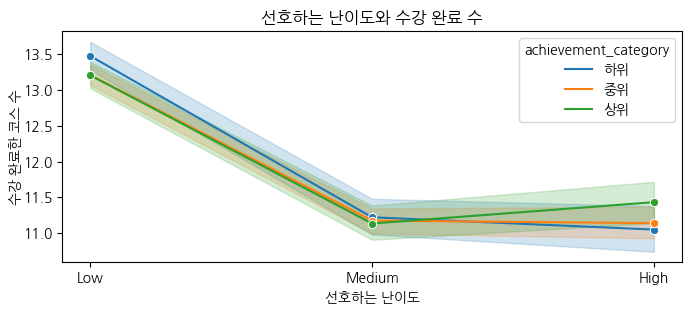

In [219]:
plt.figure(figsize=(8, 3))
sns.lineplot(y='total_completed_courses', x='preferred_difficulty_level', hue='achievement_category', marker='o', data=df)
plt.xlabel('선호하는 난이도',loc='center', labelpad=5, fontsize=10)
plt.ylabel('수강 완료한 코스 수', labelpad=0, fontsize=10)
plt.title('선호하는 난이도와 수강 완료 수')
plt.show()

라인으로 자세히 보면 low 선호도가 2-3개 정도 더 많이 수강하고 있음을 알 수 있다.
이는 
1) 선호하는 난이도에 따라 강좌가 추천되므로 더 쉬운 강좌들을 빨리 수강한 것으로 볼 수 있거나
2) 강좌들 자체가 초급 수강생들 위주로 타겟팅되고 있음을 추론해볼 수 있다.
   
가설을 세우진 않았지만 유의미한 결과로 보이며    
추후 더 많은 low 난이도 선호도의 학생들을 온보딩시키기 위해 단계별 가이드를 잘 제시할 필요가 있다.   
또한 모든 수강생들의 입맛에 맞게 medium 라인의 강좌들을 고도화하거나 보충할 필요도 보인다.

### 제 3가설은 채택하고, 프리미엄 구독자의 기타 패턴들도 살펴보자.

In [ ]:
stt = df.groupby(["subscription_type", "target"]).count().

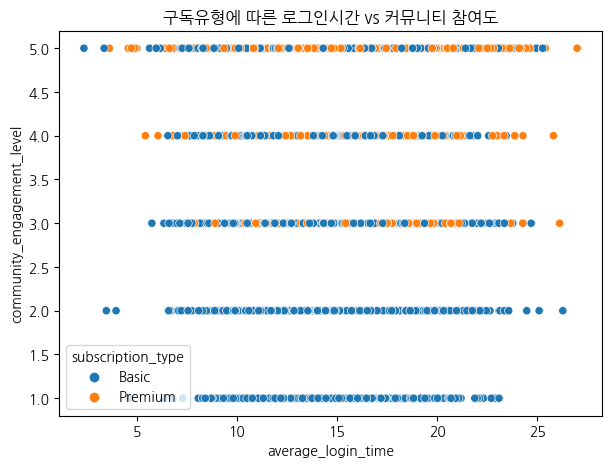

In [221]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="average_login_time", y="community_engagement_level", hue="subscription_type")
plt.title("구독유형에 따른 로그인시간 vs 커뮤니티 참여도")
plt.show()

로그인 시간과 커뮤니티 참여도와의 관계를 봤을때는   
로그인 시간이 길면 그만큼 커뮤니티에 많이 참여하긴 하지만   
전반적으로 치우치지 않고 고루 분포되어 있는 것으로 보인다.   
그런데 구독유형에 따라 유의미한 차이를 보였다.

프리미엄 구독자가 베이직보다 2단계 가량 더 높은 커뮤니티 참여도와    
상대적으로 긴 로그인 시간 패턴을 보였다.  
이미 프리미엄 구독자의 높은 충성도가 형성되었다고 볼 수 있겠다.   
우선은 고객들을 프리미엄 구독자로 끌어들이면 수강도 많이 하고, 커뮤니티도 더 많이 참여한다.   
최대한 프리미엄 구독자를 만들어야한다.

In [223]:
stt = df.groupby(["subscription_type", "target"]).count().reset_index()
stt[['subscription_type', 'target', 'user_id']]

,subscription_type,target,user_id
0,Basic,0,2296
1,Basic,1,3683
2,Premium,0,1505
3,Premium,1,2516


In [207]:
conversion_count = stt[(stt['subscription_type'] == 'Premium') & (stt['target'] == 1)]['user_id'].values[0]
total_count = stt[stt['subscription_type'] == 'Premium']['user_id'].sum()
conversion_count2 = stt[(stt['subscription_type'] == 'Basic') & (stt['target'] == 1)]['user_id'].values[0]
total_count2 = stt[stt['subscription_type'] == 'Basic']['user_id'].sum()

conversion_rate = conversion_count / total_count
conversion_rate2 = conversion_count2 / total_count2

print(f'Premium 에서의 구독 연장율: {conversion_rate:.2%}')
print(f'Basic 에서의 구독 연장율: {conversion_rate2:.2%}')

Premium 에서의 구독 연장율: 62.57%
Basic 에서의 구독 연장율: 61.60%


구독유형별로 전환율의 차이는 대략 1% 가량으로 미미하다.

# 결론

- 학습을 오래 한다고 해서 성적이 더 잘나오는 것도, 커뮤니티에 더 참여하는 것도, 수강 완료를 더 많이 하는 것도 아니지만 
구독 결정에는 영향을 미친다.
-> 수익면에서는 더 오래 학습할 수 있도록 독려하는 것이 좋다. 
- 커뮤니티에 많이 참여하면 학습 완료율도 높아진다 / 또는 완강을 많이 하는 수강생들이 커뮤니티에 많이 참여한다.   
-> 물론 그렇다고 하여 성적이 잘 나오는 것은 아니다.
- 선호 난이도별 완강율을 보면 강좌들 자체가 초급 수강생들 위주로 타겟팅되는 것으로 보인다.    
-> 더 많은 low 난이도 선호도의 학생들을 온보딩시키기 위해 low 강좌 수를 유지하고, high 레벨 선호자를 위한 medium 강의도 늘려야한다.
- 프리미엄 구독자의 수강 완료율, 커뮤니티 참여도, 로그인 시간 등이 베이직보다 높았다.    
-> 프리미엄 구독자를 많이 유치하기 위해 허들을 낮출 필요도 있어 보인다.

# 회고

1) 각 학습 세션에 소요된 평균 시간 (분) 이랑 월간 활동적인 학습 일수 도 qcut으로 범주화해서 여러 관계들을 좀 살펴봤어야했다.

2) 사용자가 가장 많이 마지막으로 로그인한 일자에 맞춰서 매월 이벤트 팝업을 띄워볼까? 하는 계획도 세웠는데, 
로그인 일자 시계열 분석을 못했다.